## Retrive Sea Ice Concentration (1km) from MODIS surface reflectance MOD09GA

### 1. MODIS SIC algorithm (Shi and Su, 2018): broadband albedo (BBA) $\alpha$

$ \alpha = R1 * 0.3265 + R4 * 0.2366 + R3 * 0.4364$

albedo of pure water $ Aw $ is 0.08 

albedo of pure ice   $ Ai $ is 0.67 

### 2. Read cloud mask from 'state_1km'
### 3. Add new variables - sic and cloud_mask into dataset and save it as `mosaic_sic_yyyymmdd.nc`
### If a pixel passes this group of criteria tests it is identified as sea ice in the MODIS sea ice product.

In [1]:
import numpy as np
import xarray as xr
import netCDF4
from pyhdf import SD
import glob
# import xesmf as xe

In [2]:
import os
import matplotlib.pyplot as plt
# from mpl_toolkits.basemap import Basemap

In [3]:
# os.chdir('C:\\Users\\kathy\\Downloads')
# os.chdir('C:\\Users\\kathy\\Downloads\\20070828')
# os.chdir('C:\\Users\\kathy\\Downloads\\20080701')
# os.chdir('C:\\Users\\kathy\\Downloads\\MOD09GA-surface-reflectance\\20100628')

# os.chdir('D:\\MOD09GA\\NT2\\Terra\\')
os.chdir('D:\\MOD09GA\\NT2\\Aqua\\')

# os.chdir('D:\\MOD09GA\\ASI\\Terra\\')
# os.chdir('D:\\MOD09GA\\ASI\\Aqua\\')

# os.chdir('D:\\kexin\\MOD09GA\\Aqua_new')  # new hard disk




In [4]:
fl=[]
for f in os.listdir():
    if f.endswith('.nc'):
        fl.append(f)
fl   


['mosaic_20070822.nc',
 'mosaic_20100806.nc',
 'mosaic_20100831.nc',
 'mosaic_20100906.nc',
 'mosaic_20110810.nc',
 'mosaic_20110825.nc',
 'mosaic_20120831.nc',
 'mosaic_20120916.nc',
 'mosaic_20130817.nc',
 'mosaic_20160908.nc',
 'mosaic_20190828.nc']

In [5]:
# fname = 'MYD09GA.A2007241.h19v00.006.2015164141438_reprojected_FB_nodelta.nc'
# fname = 'mosaic_FB.nc'
# fname = 'mosaic_20080701.nc'
# fname = 'mosaic_20100628.nc'

fname = fl[0]
# fname = fl[1]
# fname = fl[2]
# fname = fl[3]
# fname = fl[4]
# fname = fl[5]
# fname = fl[6]
# fname = fl[7]
# fname = fl[8]
# fname = fl[9]
# fname = fl[10]
# fname = fl[11]
# fname = fl[12]
# fname = fl[13]
# fname = fl[14]
# fname = fl[15]
# fname = fl[16]
# fname = fl[17]
# fname = fl[18]
# fname = fl[19]


date = fname[-11:-3]
print(date)

filename = os.path.join(os.getcwd(), fname)
print(filename)

20070822
D:\MOD09GA\NT2\Aqua\mosaic_20070822.nc


In [6]:
ds = xr.open_dataset(filename)
# ds

In [7]:
lat = ds.lat.values
lon = ds.lon.values

sur_refl_b01 = ds.sur_refl_b01_1.values/100000000.0

sur_refl_b02 = ds.sur_refl_b02_1.values/100000000.0
sur_refl_b03 = ds.sur_refl_b03_1.values/100000000.0
sur_refl_b04 = ds.sur_refl_b04_1.values/100000000.0
sur_refl_b06 = ds.sur_refl_b06_1.values/100000000.0

print(sur_refl_b01.min(),sur_refl_b01.mean(),sur_refl_b01.max())
print(sur_refl_b02.min(),sur_refl_b02.mean(),sur_refl_b02.max())
print(sur_refl_b03.min(),sur_refl_b03.mean(),sur_refl_b03.max())
print(sur_refl_b04.min(),sur_refl_b04.mean(),sur_refl_b04.max())
print(sur_refl_b06.min(),sur_refl_b06.mean(),sur_refl_b06.max())

-0.01 0.08543118 1.6
-0.01 0.07474763 1.6
0.0 0.09958054 1.5125624
-0.01 0.09451429 1.6
-0.0023208775 0.0038680993 1.5468843


In [40]:
# ds['sur_refl_b01_1'].plot()

### MODIS SIC algorithm 1: broadband albedo (BBA) $\alpha$

$ \alpha = R1 * 0.3265 + R4 * 0.2366 + R3 * 0.4364$

albedo of pure water $ Aw $ is 0.08 

albedo of pure ice   $ Ai $ is 0.67 

In [8]:
alpha = sur_refl_b01*0.3265 + sur_refl_b04 * 0.2366 + sur_refl_b03 * 0.4364
alpha

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

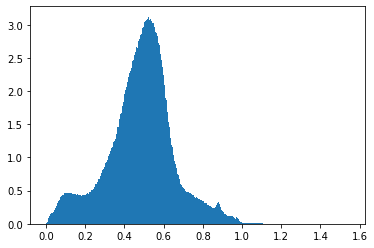

In [9]:
alpha_m = np.ma.masked_where(alpha == 0, alpha)
plt.hist(np.ma.compressed(alpha_m),bins=512,density=True);

In [10]:
(n,m) = alpha_m.shape
sic = np.zeros((n,m))
sic.shape

(4511, 3907)

In [11]:
sic = np.where(alpha_m < 0.06, 0, sic)
sic = np.where(alpha_m > 0.60, 100, sic)

In [12]:
ind = np.where((alpha_m > 0.06) & (alpha_m < 0.60))
sic[ind] = (alpha_m[ind]-0.06)/0.54*100


In [13]:
sic.min(),sic.mean(),sic.max()

(0.0, 14.421212538586841, 100.0)

In [14]:
sic_m = np.ma.masked_where(lat <= 84, sic)

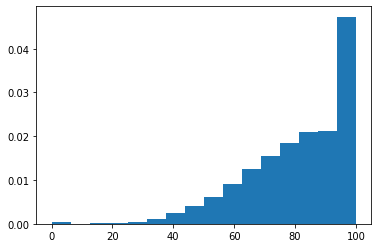

In [15]:
# plt.hist(np.ma.compressed(sic),bins=16,density=True);
plt.hist(np.ma.compressed(sic_m),bins=16,density=True);

In [16]:
sic_m.min(),sic_m.mean(),sic_m.max()

(0.0, 81.00697413110214, 100.0)

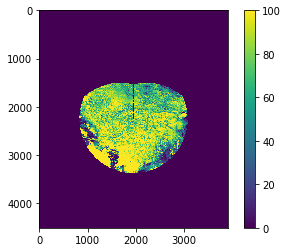

In [17]:
plt.imshow(sic)
# plt.imshow(sic_m)
plt.colorbar()

In [51]:
# ds.QC_500m_1.dims
# ds.sur_refl_b01_1.dims

In [18]:
SIC = xr.as_variable((ds.sur_refl_b01_1.dims,sic),name='sic')
SIC.dims

('y', 'x')

In [19]:
# help(ds.assign)
ds = ds.assign(sic = SIC)

### Now, read cloud mask from 'state_1km'

In [20]:
state_1km = ds.state_1km_1.values
state_1km.mean()

2346.7815

In [21]:
cloud_mask = np.empty(state_1km.shape)
cloud_mask.fill(np.nan)

In [22]:
state_1km_m = np.ma.masked_invalid(state_1km)
# np.unique(state_1km_m)

In [23]:
# find index of 'not-nan' elements
ind = np.argwhere(~np.isnan(state_1km))

'''
00: clear   -> int 0
01: cloudy  -> int 1
10: mixed   -> int 2
'''
for i in range(ind.shape[0]):
    
    a = state_1km[ind[i][0],ind[i][1]]
    b = np.binary_repr(int(a),width=16)  # 16-bit representation of 'a'
    c = '0b'+b[-2:]  # last 2 bit
    cloud_mask[ind[i][0],ind[i][1]] = int(c,2) # convert binary number to decimal 

In [24]:
# plt.imshow(cloud_mask,cmap='tab10')
# plt.colorbar()

In [25]:
# assign mixed pixel to cloudy
cloud_mask[cloud_mask == 2] = 1

In [26]:
CLOUD_MASK = xr.as_variable((ds.sur_refl_b01_1.dims,cloud_mask),name='cloud_mask')
CLOUD_MASK.dims

('y', 'x')

In [28]:
ds = ds.assign(cloud_mask = CLOUD_MASK)

In [29]:
fname = 'mosaic_sic_'+date+'.nc'
ds.to_netcdf(path=fname,mode='w',format='NETCDF4')

print(date+' ok')

20070822 ok


## End here.

In [ ]:
os.getcwd()

In [30]:
ds.close

<bound method DataWithCoords.close of <xarray.Dataset>
Dimensions:                      (x: 3907, y: 4511)
Coordinates:
    lat                          (y, x) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    lon                          (y, x) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
Dimensions without coordinates: x, y
Data variables:
    metadata                     int8 ...
    QC_500m_1                    (y, x) float32 ...
    QC_500m_1_count              (y, x) int32 ...
    Range_1                      (y, x) float32 ...
    Range_1_count                (y, x) int32 ...
    SensorAzimuth_1              (y, x) float32 ...
    SensorAzimuth_1_count        (y, x) int32 ...
    SensorZenith_1               (y, x) float32 ...
    SensorZenith_1_count         (y, x) int32 ...
    SolarAzimuth_1               (y, x) float32 ...
    SolarAzimuth_1_count         (y, x) int32 ...
    SolarZenith_1                (y, x) float32 ...
    SolarZenith_1_count          (y, x) int32 ...
    gflags_1 